# TASK 1

In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn.metrics as metric
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import missingno as msno 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

#### Train set

In [2]:
cardio = pd.read_csv('cardio-train.csv',sep = ';')

In [3]:
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,20535.0,NaN,163.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,0
1,88880,16125.0,Men,168.0,68.0,110.0,70.0,NaN,NaN,0.0,0.0,NaN,0
2,10483,19761.0,NaN,170.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,1
3,22798,19035.0,Men,NaN,89.0,NaN,80.0,Normal,NaN,0.0,NaN,NaN,0
4,85542,NaN,NaN,158.0,74.0,NaN,93.0,High,NaN,0.0,1.0,1.0,1


#### Validation set

In [4]:
cardio_validation = pd.read_csv("cardio-validation.csv")

### 1. Identify the dataset columns into nominal, categorical, continuous etc. categories

##### Nominal columns:     gender, smoke, alco, active, cardio
##### Categorical columns: cholesterol, gluc
##### Continues columns:   id, age, height, weight, ap_hi, ap_lo

#### Until here just took cardio-train and cardio-validation datasets

### 2. Use dataframe.info and dataframe.describe to get the insights about the data

In [5]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
id             500 non-null int64
age            335 non-null float64
gender         329 non-null object
height         198 non-null float64
weight         336 non-null float64
ap_hi          347 non-null float64
ap_lo          332 non-null float64
cholesterol    333 non-null object
gluc           333 non-null object
smoke          326 non-null float64
alco           335 non-null float64
active         343 non-null float64
cardio         500 non-null int64
dtypes: float64(8), int64(2), object(3)
memory usage: 50.9+ KB


We can see that our data has null values, as from info() not all columns have 500 entries completely filled. For ex: Gender has 329 non-null values, that means remaining 171 rows are having null values

In [6]:
cardio.describe()

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,500.000000,335.000000,198.000000,336.000000,347.000000,332.000000,326.000000,335.000000,343.000000,500.000000
mean,50279.916000,19490.886567,163.934343,74.347321,128.685879,90.060241,0.092025,0.065672,0.813411,0.502000
std,29913.623631,2466.702487,8.258559,14.335964,18.490176,87.396945,0.289505,0.248078,0.390150,0.500497
min,38.000000,14334.000000,120.000000,45.000000,12.000000,60.000000,0.000000,0.000000,0.000000,0.000000
25%,23446.500000,17988.500000,159.250000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,51913.500000,19719.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,1.000000
75%,78656.000000,21597.500000,168.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,99662.000000,23479.000000,187.000000,155.000000,190.000000,1000.000000,1.000000,1.000000,1.000000,1.000000


### 3. Find the number of null values for each column

In [7]:
cardio.isnull().sum()

id               0
age            165
gender         171
height         302
weight         164
ap_hi          153
ap_lo          168
cholesterol    167
gluc           167
smoke          174
alco           165
active         157
cardio           0
dtype: int64

### 4. Know about the patients

As age column has extremely large numbers as values, with the assumption that the ages are given in days, lets convert them to years for both train as well as validation data

Age conversion from days to years for train data

In [8]:
cardio['age'] = (cardio['age']/365).round()
cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,56.0,NaN,163.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,0
1,88880,44.0,Men,168.0,68.0,110.0,70.0,NaN,NaN,0.0,0.0,NaN,0
2,10483,54.0,NaN,170.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,1
3,22798,52.0,Men,NaN,89.0,NaN,80.0,Normal,NaN,0.0,NaN,NaN,0
4,85542,NaN,NaN,158.0,74.0,NaN,93.0,High,NaN,0.0,1.0,1.0,1
5,81772,46.0,Women,178.0,NaN,160.0,NaN,Normal,NaN,1.0,1.0,NaN,1
6,7824,50.0,NaN,NaN,45.0,NaN,70.0,Normal,Normal,0.0,0.0,1.0,0
7,75053,53.0,NaN,NaN,69.0,NaN,80.0,Normal,Normal,0.0,0.0,NaN,0
8,48292,58.0,Women,NaN,93.0,NaN,80.0,NaN,NaN,0.0,0.0,NaN,0
9,66074,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0


Age conversion from days to years for Validation data

In [9]:
cardio_validation['age'] = (cardio_validation['age']/365).round()
cardio_validation.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,17934,52.0,Men,165.0,60.0,NaN,80.0,Normal,NaN,0.0,0.0,1.0,1
1,52450,49.0,NaN,NaN,58.8,120.0,90.0,Normal,Normal,NaN,0.0,1.0,0
2,37653,NaN,NaN,159.0,93.0,130.0,90.0,High,Normal,0.0,0.0,NaN,1
3,96970,63.0,Women,172.0,NaN,NaN,100.0,Normal,Normal,0.0,0.0,1.0,1
4,50977,NaN,Women,NaN,116.0,NaN,80.0,High,NaN,NaN,NaN,1.0,1


### a. Find the Oldest Person

In [10]:
cardio[cardio['age']== cardio['age'].max()]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
11,64953,64.0,Men,NaN,69.0,140.0,100.0,Normal,NaN,NaN,0.0,NaN,1
68,91506,64.0,NaN,NaN,NaN,140.0,80.0,NaN,NaN,0.0,0.0,NaN,1
83,89169,64.0,Men,NaN,NaN,NaN,80.0,NaN,Normal,0.0,0.0,1.0,1
112,15434,64.0,NaN,167.0,104.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN,1
119,8798,64.0,NaN,NaN,54.0,120.0,NaN,NaN,Normal,0.0,0.0,NaN,1
162,8631,64.0,Men,NaN,96.0,120.0,NaN,NaN,NaN,0.0,NaN,1.0,0
169,94097,64.0,NaN,157.0,80.0,140.0,NaN,High,Above Normal,0.0,NaN,1.0,1
181,84352,64.0,Men,NaN,NaN,130.0,NaN,NaN,NaN,0.0,0.0,1.0,1
269,38406,64.0,Men,NaN,106.0,NaN,NaN,Normal,NaN,0.0,0.0,NaN,1
348,24307,64.0,Men,162.0,118.0,120.0,80.0,Normal,Normal,NaN,0.0,1.0,0


In [11]:
cardio.loc[cardio['age'].idxmax()]

id              64953
age                64
gender            Men
height            NaN
weight             69
ap_hi             140
ap_lo             100
cholesterol    Normal
gluc              NaN
smoke             NaN
alco                0
active            NaN
cardio              1
Name: 11, dtype: object

### b. Find the Youngest Person

In [12]:
cardio[cardio['age']== cardio['age'].min()]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
147,44000,39.0,NaN,163.0,NaN,130.0,NaN,Normal,NaN,0.0,0.0,NaN,0


In [13]:
cardio.loc[cardio['age'].idxmin()]

id              44000
age                39
gender            NaN
height            163
weight            NaN
ap_hi             130
ap_lo             NaN
cholesterol    Normal
gluc              NaN
smoke               0
alco                0
active            NaN
cardio              0
Name: 147, dtype: object

### c. Find the average age group

In [14]:
avg = cardio['age'].mean()
print('Average age group: ',avg)

Average age group:  53.38805970149254


### d. Find the Median Age

In [15]:
med = cardio['age'].median()
print('Median age group: ',med)

Median age group:  54.0


### e. Find the relationship between cardio and age (the cardio column is the prediction variable)

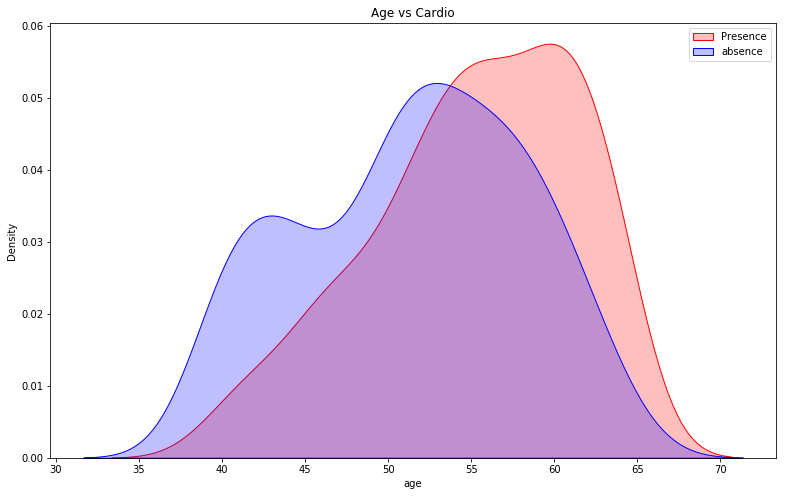

In [16]:
plt.figure(figsize=(13,8))
sns.kdeplot( cardio.age[cardio.cardio==1], color="red", shade=True)
sns.kdeplot( cardio.age[cardio.cardio==0], color="blue", shade=True)
plt.legend(["Presence","absence"])
plt.title("Age vs Cardio")
plt.savefig("cardio_vs_age.png")

We can notice that as the age increases, chances of having cardio vascular diseases increases. 

In [17]:
df=cardio.loc[:,["age","cardio"]]
cor=df.corr()

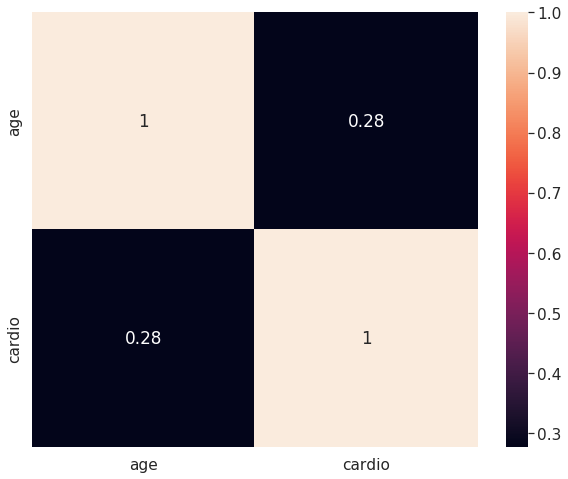

In [18]:
sns.set(font_scale=1.4)
plt.figure(figsize=(10,8))
sns.heatmap(cor, annot=True)
plt.savefig("age_vs_cardio_heatmap.png")

Age and Cardio have positive correlation, but not too high

### f. Find the age groups whose survival rate is the largest

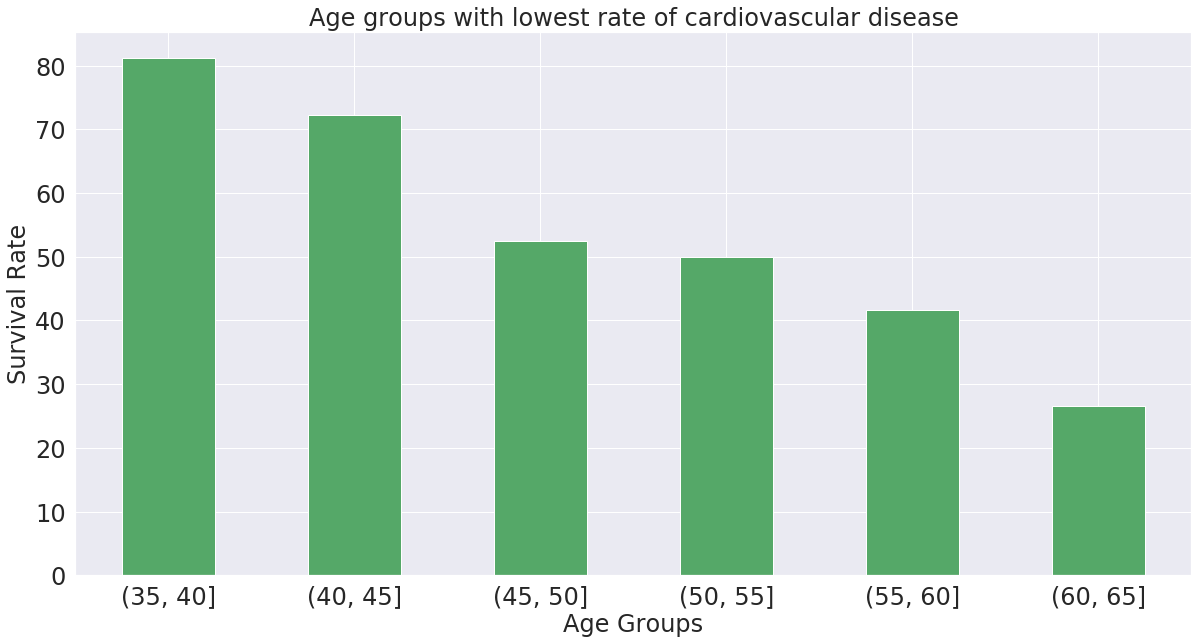

In [19]:
df1=cardio[cardio.cardio==0]
bins=[35,40,45,50,55,60,65]
out=pd.cut(df1.age, bins=bins) #People not having cardio
out1=pd.cut(cardio.age, bins=bins) #Total number of people
ax=((out.value_counts(sort=False)/out1.value_counts(sort=False))*100).plot.bar(rot=0, color='g',figsize=(20,10))
plt.xticks(fontsize= 24)
plt.xlabel("Age Groups",fontsize= 24)
plt.ylabel("Survival Rate",fontsize= 24)
plt.title("Age groups with lowest rate of cardiovascular disease",fontsize= 24)
plt.yticks(fontsize= 24)
plt.savefig("age_survival")

NOTE: The graph above is plotted as (people who don't have cardio/ Total Number of people) for an age bin The age group with lowest chance of chardiovascular disease is between 35-40 years

#### Label encoding the object categorical into integer categorical values which will help in visualization as well as training and testing 

###### Encoding Train data

In [20]:
cardio.gender = cardio.gender.map({'Men':1, 'Women' : 0})
cardio.cholesterol = cardio.cholesterol.map({'Normal':0, 'Above Normal' : 1,'High':2 })
cardio.gluc = cardio.gluc.map({'Normal':0, 'Above Normal' : 1,'High':2 })

###### Encoding Validation data

In [21]:
cardio_validation.gender = cardio_validation.gender.map({'Men':1, 'Women' : 0})
cardio_validation.cholesterol = cardio_validation.cholesterol.map({'Normal':0, 'Above Normal' : 1,'High':2 })
cardio_validation.gluc = cardio_validation.gluc.map({'Normal':0, 'Above Normal' : 1,'High':2 })

### g. Find similar relationships for at least 3-4 columns that you think can play a role in prediction (For example, systolic BP, cholesterol etc.)

#### 1. Systolic blood pressure vs Cardio


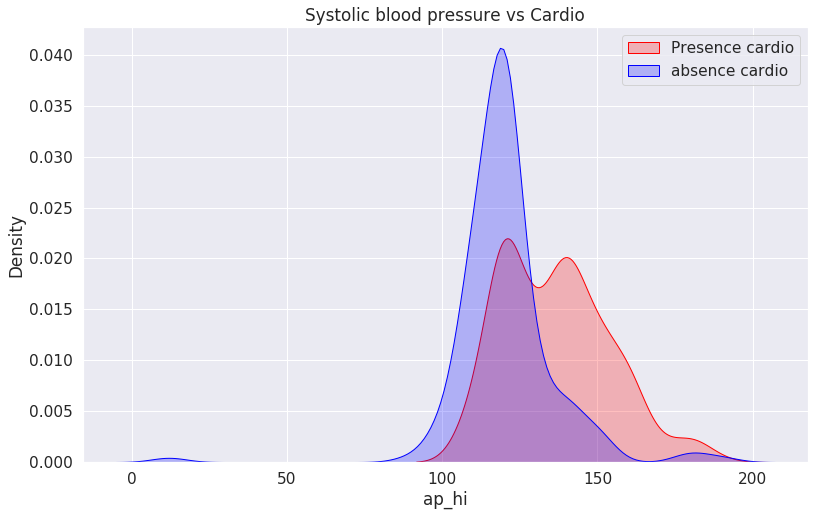

In [22]:
plt.figure(figsize=(13,8))

sns.kdeplot( cardio.ap_hi[df.cardio==1], color="red", shade=True)

sns.kdeplot( cardio.ap_hi[df.cardio==0], color="blue", shade=True)

plt.legend(["Presence cardio","absence cardio"])
plt.title("Systolic blood pressure vs Cardio")

plt.savefig("cardio_vs_aphi.png")

some people with cardiovascular disease have a higher systolic blood pressure

### 2. cholesterol vs cardio 

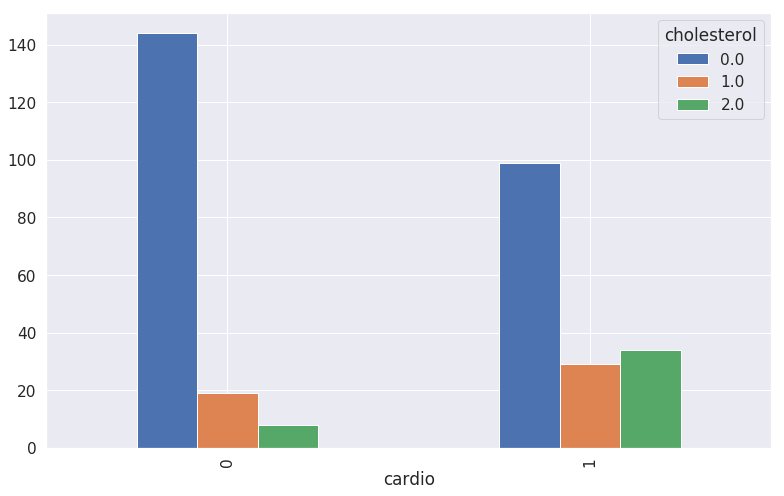

In [23]:
group=df.groupby([cardio['cardio'], cardio["cholesterol"]]).size()
group_pd=group.unstack(level=1)
group_pd.plot(kind='bar', figsize=(13,8))
plt.savefig("cholesterol vs cardio.png")

We observe people with cardiovascular disease have higher cholesterol as compared to the ones without cardiovascular disease(comparing the green bar plot from the above plot)

### 3. glucose vs cardio

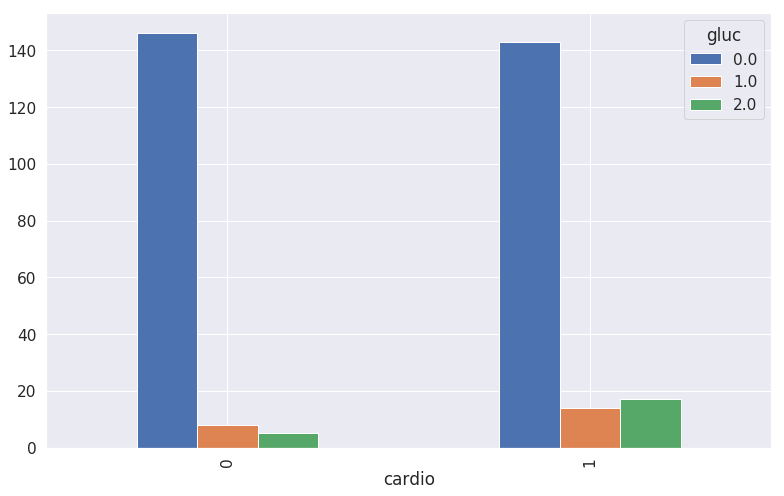

In [24]:
group_g=df.groupby([cardio['cardio'], cardio["gluc"]]).size()
group_pd_g=group_g.unstack(level=1)
group_pd_g.plot(kind='bar', figsize=(13,8))
plt.savefig("gluc vs cardio.png")

We observe people with cardiovascular disease have higher glucose level as compared to the ones without cardiovascular disease(comparing the green bar plot from the above plot)

### h. Get more visuals on Data Distributions and use the information from the plots to get an intuition for selecting feature variables

### 1. Use plotCorrelationMatrix

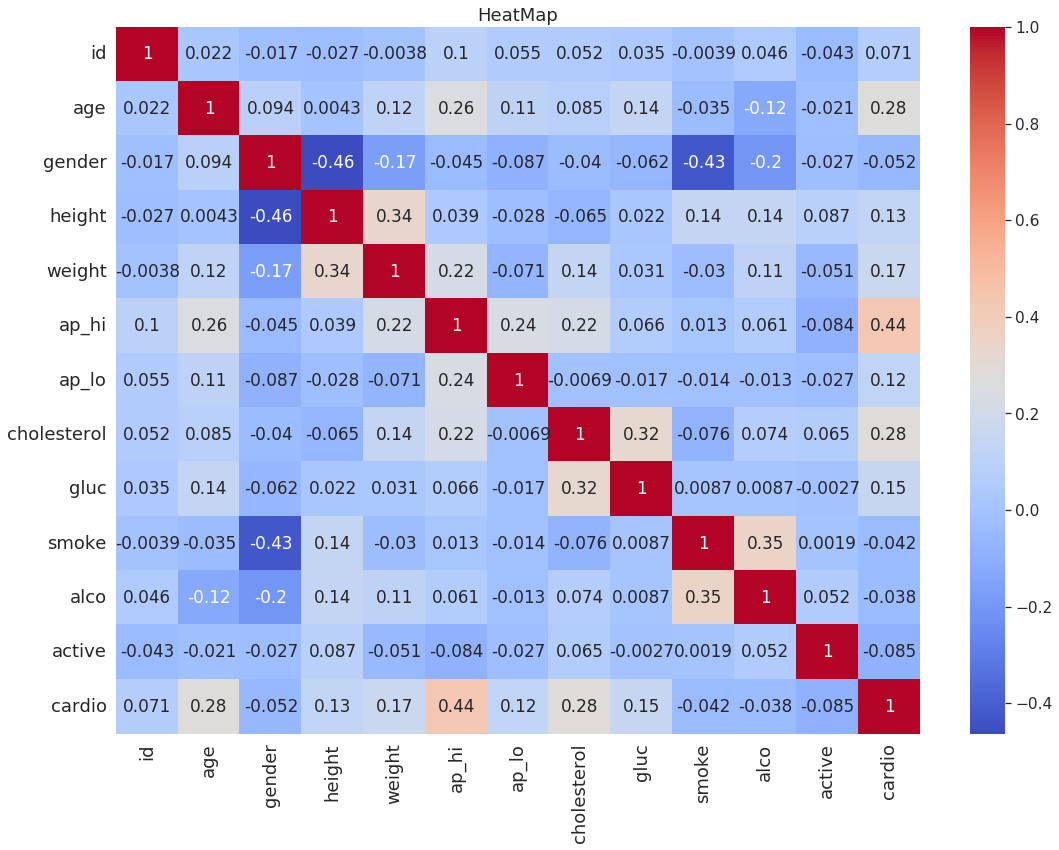

In [25]:
#correlation matrix
cor=cardio.corr()
plt.figure(figsize=(18,13))
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.xticks(fontsize= 18)
plt.title("HeatMap",fontsize= 18)
plt.yticks(fontsize= 18)
plt.savefig("heatmap.png")

From the heatmap, it seems that age,ap_hi, weight, height and ap_lo are slightly correlated wrt cardio(target).

### 2. plotscattermatrix

<Figure size 1800x1440 with 0 Axes>

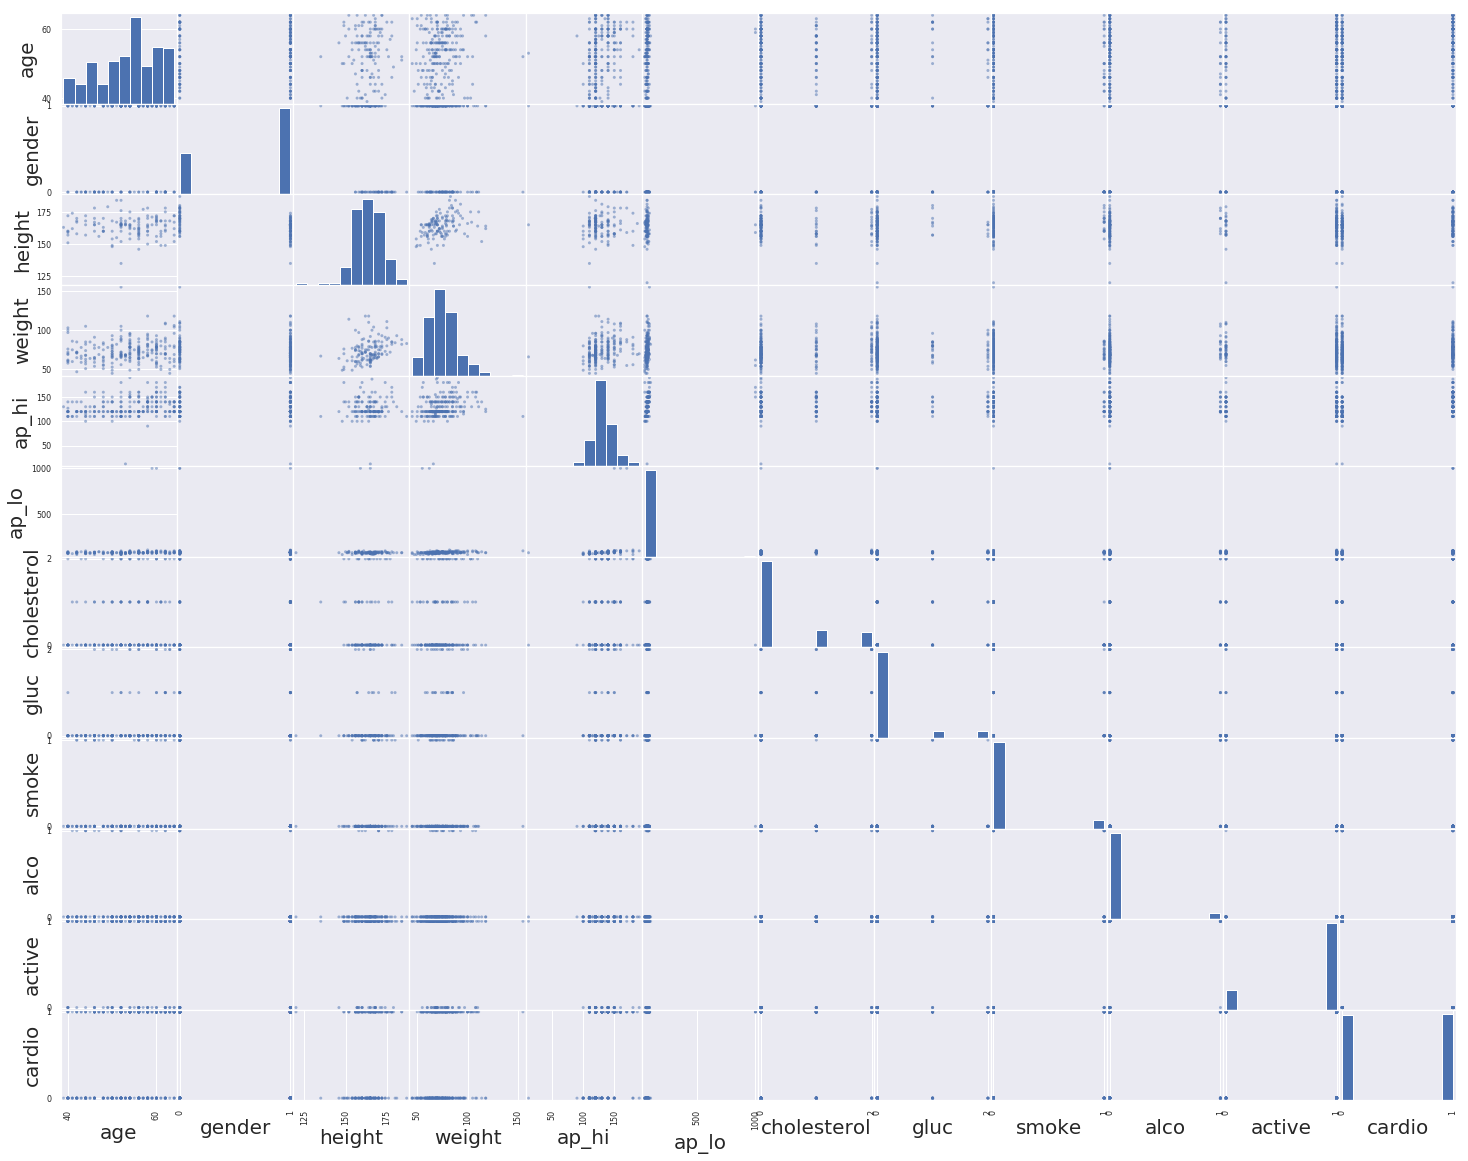

In [26]:
plt.figure(figsize=(25,20))
scatter_matrix=pd.plotting.scatter_matrix(cardio.iloc[:,1:],figsize=(25,20))
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20)
plt.savefig("pairplot.png")

### 3. Plotpercolumn

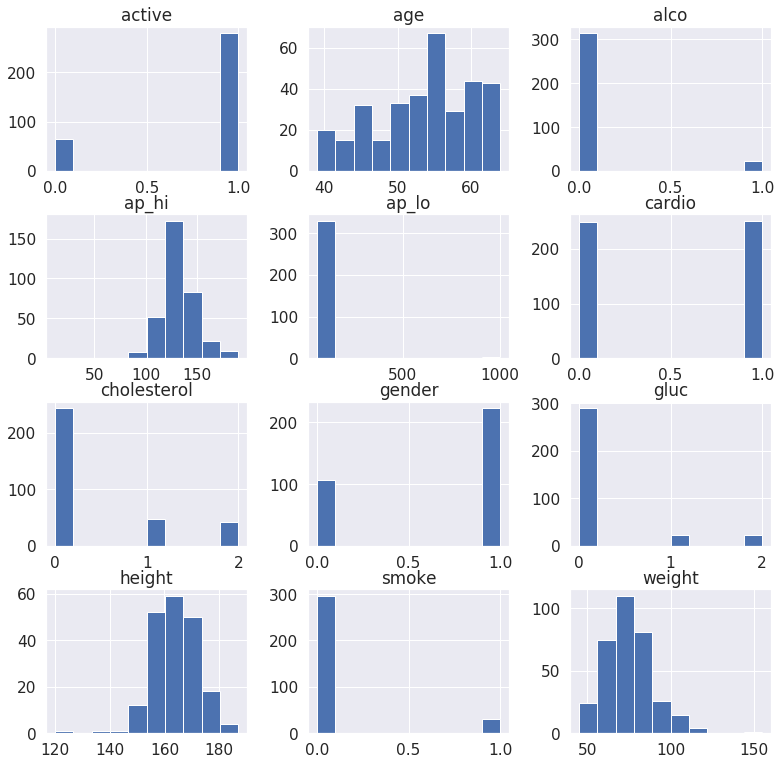

In [27]:
cardio.iloc[:,1:].hist(figsize=(13,13))
plt.savefig("histplot.png")

### (i) Dropping Id column as it plays no role in classifying whether a person has cardiovascular disease or no

##### Dropping id column from Train data

In [28]:
cardio=cardio.drop(columns="id")

##### Dropping id column from Validation data

In [29]:
cardio_validation=cardio_validation.drop(columns="id")

### i. Find missing values
### i. Get the count of missing values

In [30]:
cardio.isna().sum()

age            165
gender         171
height         302
weight         164
ap_hi          153
ap_lo          168
cholesterol    167
gluc           167
smoke          174
alco           165
active         157
cardio           0
dtype: int64

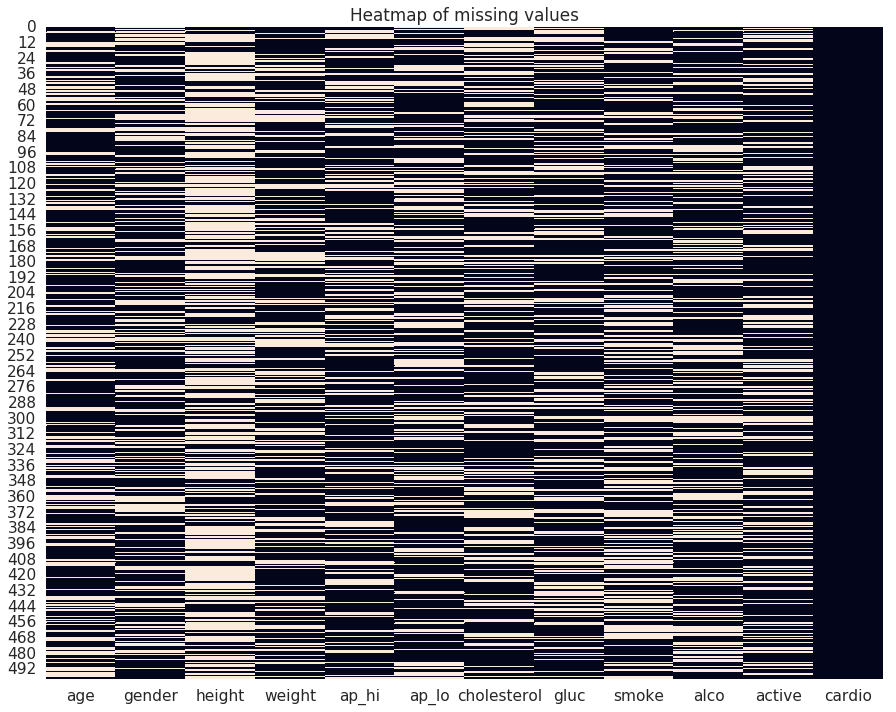

In [31]:
plt.figure(figsize=(15,12))
sns.heatmap(cardio.isnull(), cbar=False)
plt.title("Heatmap of missing values")
plt.savefig("heatmap_missing.png")

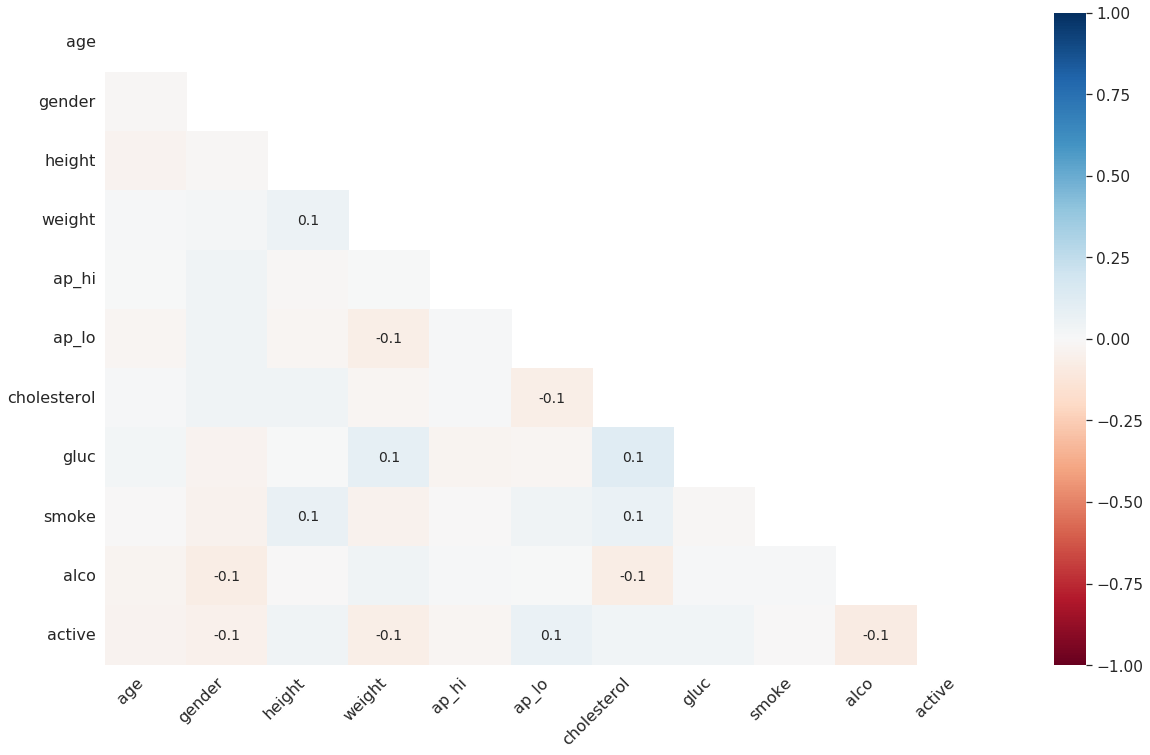

In [32]:
import missingno as msno
msno.heatmap(cardio)
plt.savefig('heatmap_msno')

### Pushing Cardio(target) column to the last column in Train set

In [33]:
cardio.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [34]:
columnsTitles = ['age','gender', 'height','weight','ap_hi','ap_lo','cholesterol', 'gluc','smoke','alco','active',
        'cardio']
cardio_copy = cardio.reindex(columns=columnsTitles)##Pushed cardio(target) to last column in train set

### Pushing Cardio(target) column to the last column in Validation set

In [35]:
columnsTitles = ['age','gender', 'height','weight','ap_hi','ap_lo','cholesterol', 'gluc','smoke','alco','active',
        'cardio']
cardio_copy1 = cardio_validation.reindex(columns=columnsTitles)##Pushed cardio(target) to last column in validation set

### j. Applying a different technique to handle missing values (For each technique verify your predictionresults)
### i. Use dropna

In [36]:
cardio_drop =cardio_copy.dropna()

#### ii. Use replace NA with zero or max value

##### Replacing with zero

In [37]:
cardio_impute_zeros = cardio_copy.fillna(0)

##### Replacing with max value

In [38]:
cardio_impute_mode = cardio_copy.fillna(cardio_copy.max())

##### Replacing with mean value

In [39]:
cardio_impute_mean = cardio_copy.apply(lambda x: x.fillna(x.mean())) 

#### iv. Search for additional techniques to handle null values, excluding theabove three and test

##### Replacing with median value

In [40]:
cardio_impute_median = cardio_copy.apply(lambda x: x.fillna(x.median())) 

### Miss tree

In [41]:
from missingpy import MissForest
imputer = MissForest()
df_forest = imputer.fit_transform(cardio_copy)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


### Imputing mean,median and mode values for train and validation data (Best imputation)

In [42]:
cardio_org = cardio.copy(deep =True)
cardio_val_org = cardio_validation.copy(deep =True)

In [43]:
import numpy as np
cardio_med = ['ap_lo', 'height','weight']
for col in cardio_med:
    x = np.nanmedian(cardio[col].values)
    cardio[col].replace(np.nan, x, inplace=True)

In [44]:
cardio_med1 = ['ap_lo', 'height', 'weight']
for col in cardio_med1:
    x = np.nanmedian(cardio_validation[col].values)
    cardio_validation[col].replace(np.nan, x, inplace=True)

In [45]:
cardio_mean = ['age', 'ap_hi']
for col in cardio_mean:
        y = np.nanmean(cardio[col].values)
        cardio[col].replace(np.nan, y, inplace=True)

In [46]:
cardio_mean1 = ['age', 'ap_hi']
for col in cardio_mean:
        y = np.nanmean(cardio_validation[col].values)
        cardio_validation[col].replace(np.nan, y, inplace=True)

In [47]:
from scipy import stats
cardio_mode = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
for col in cardio_mode:
        mode_column, _ = stats.mode(cardio[col])
        cardio[col].replace(np.nan, mode_column[0], inplace=True)

In [48]:
cardio_mode1 = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
for col in cardio_mode1:
        mode_column, _= stats.mode(cardio_validation[col])
        cardio_validation[col].replace(np.nan, mode_column[0], inplace=True)

In [49]:
columnsTitles = ['age','gender','height','weight', 'ap_hi','ap_lo','cholesterol', 'gluc','smoke','alco','active',
       'cardio']
cardio_validation = cardio_validation.reindex(columns=columnsTitles)##Pushed cardio(target) to last column in train set

In [50]:
columnsTitles = ['age','gender','height','weight', 'ap_hi','ap_lo','cholesterol', 'gluc','smoke','alco','active',
       'cardio']
cardio = cardio.reindex(columns=columnsTitles)##Pushed cardio(target) to last column in train set

### Verify missing value techniques


In [51]:
cardio['age'].mode()

0    53.38806
dtype: float64

In [52]:
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,56.00000,1.0,163.0,75.0,120.000000,80.0,0.0,0.0,0.0,0.0,1.0,0
1,44.00000,1.0,168.0,68.0,110.000000,70.0,0.0,0.0,0.0,0.0,1.0,0
2,54.00000,1.0,170.0,75.0,120.000000,80.0,0.0,0.0,0.0,0.0,1.0,1
3,52.00000,1.0,165.0,89.0,128.685879,80.0,0.0,0.0,0.0,0.0,1.0,0
4,53.38806,1.0,158.0,74.0,128.685879,93.0,2.0,0.0,0.0,1.0,1.0,1


In [53]:
#difference of zero and original 
zero_m=(cardio_impute_zeros.mean()-cardio.mean()).sum()
zero_s=(cardio_impute_zeros.std()-cardio.std()).sum()
print("Difference of mean ",zero_m)
print("Difference of std ",zero_s)

Difference of mean  -207.8079386640284
Difference of std  178.26065641004848


In [54]:
#difference of dropped and original 
drop_m=(cardio_drop.mean()-cardio_copy.mean()).sum()
drop_s=(cardio_drop.std()-cardio_copy.std()).sum()
print("Difference of mean ",drop_m)
print("Difference of std ",drop_s)

Difference of mean  -7.444032667967421
Difference of std  -85.36919172035404


In [55]:
#difference of mean and original 
mean_m=(cardio_impute_mean.mean()-cardio_copy.mean()).sum()
mean_s=(cardio_impute_mean.std()-cardio_copy.std()).sum()
print("Difference of mean ",mean_m)
print("Difference of std ",mean_s)

Difference of mean  8.168465903679589e-13
Difference of std  -26.682991460802253


In [56]:
#difference of median and original 
median_m=(cardio_impute_median.mean()-cardio_copy.mean()).sum()
median_s=(cardio_impute_median.std()-cardio_copy.std()).sum()
print("Difference of mean ",median_m)
print("Difference of std ",median_s)

Difference of mean  -6.044918382253137
Difference of std  -25.83845538113237


In [57]:
#difference of mean for missforest and original 
forest_m=round((df_forest.mean()-cardio_copy.mean()).sum(),2)
forest_s=round((df_forest.std()-cardio_copy.std()).sum(),2)
print("Difference of mean ",forest_m)
print("Difference of std ",forest_s)

Difference of mean  0.23
Difference of std  593.48


In [58]:
#difference of mean for mean-median-mode and original 
mean_mode_m=(cardio.mean()-cardio_copy.mean()).sum()
mean_mode_s=(cardio.std()-cardio_copy.std()).sum()
print("Difference of mean ",mean_mode_m)
print("Difference of std ",mean_mode_s)

Difference of mean  -3.5889797182247194
Difference of std  -26.358758876297145


It can be seen that Mean-Median-Mode imputation has least difference in mean and standard deviation

In [59]:
cardio_validation.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,52.000000,1.0,165.0,60.0,126.406736,80.0,0.0,0.0,0.0,0.0,1.0,1
1,49.000000,1.0,165.0,58.8,120.000000,90.0,0.0,0.0,0.0,0.0,1.0,0
2,53.046392,1.0,159.0,93.0,130.000000,90.0,2.0,0.0,0.0,0.0,1.0,1
3,63.000000,0.0,172.0,71.0,126.406736,100.0,0.0,0.0,0.0,0.0,1.0,1
4,53.046392,0.0,165.0,116.0,126.406736,80.0,2.0,0.0,0.0,0.0,1.0,1


### l. Applying the regression models that you think is most suited for this problem.

#### Splitting Train and Validation features into X_train and X_test

In [60]:
X_train = cardio.iloc[:,:-1]# Train features
X_test = cardio_validation.iloc[:,:-1]# Validation features

#### Splitting Train and Validation target variables into y_train and y_test

In [61]:
y_train = cardio.iloc[:,-1]# Train output
y_test = cardio_validation.iloc[:,-1]# Validation output

### Using SVM model

#### Accuracy of SVM model wrt Validation data

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [63]:
import numpy as np
from sklearn import svm
best_score = 0
best_C = None
best_kernel = None
for C in np.arange(0.05, 2.05, 0.05):
    for k in ['linear','poly','rbf']:
        model = svm.SVC(kernel=k, C=C)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_C = C
            best_kernel = k
print('Highest Accuracy Score: ', best_score)  
print(best_C)
print(best_kernel)

Highest Accuracy Score:  0.73
0.15000000000000002
linear


In [64]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear',C = 0.15) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [65]:
from sklearn.metrics import f1_score
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))
print("f1_score of svm model wrt train data:",f1_score(y_test, y_pred))

Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       307
           1       0.62      0.78      0.69       193

    accuracy                           0.73       500
   macro avg       0.73      0.74      0.73       500
weighted avg       0.75      0.73      0.73       500

f1_score of svm model wrt train data: 0.6896551724137931


#### Accuracy of SVM model wrt combined data(Train+Validation)

In [66]:
cardio_final = pd.concat([cardio,cardio_validation])

In [67]:
cardio_final.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,56.00000,1.0,163.0,75.0,120.000000,80.0,0.0,0.0,0.0,0.0,1.0,0
1,44.00000,1.0,168.0,68.0,110.000000,70.0,0.0,0.0,0.0,0.0,1.0,0
2,54.00000,1.0,170.0,75.0,120.000000,80.0,0.0,0.0,0.0,0.0,1.0,1
3,52.00000,1.0,165.0,89.0,128.685879,80.0,0.0,0.0,0.0,0.0,1.0,0
4,53.38806,1.0,158.0,74.0,128.685879,93.0,2.0,0.0,0.0,1.0,1.0,1


In [68]:
X = cardio_final.iloc[:,:-1]# Train features
y= cardio_final.iloc[:,-1]# Train output

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)#50
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=90)#50
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear',C = 0.15) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_test_task1 = y_test.copy()
y_pred_task1 = y_pred

In [71]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))
print("f1_score of svm model wrt train data:",f1_score(y_test, y_pred))

Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       155
           1       0.60      0.79      0.68        95

    accuracy                           0.72       250
   macro avg       0.72      0.73      0.72       250
weighted avg       0.75      0.72      0.72       250

f1_score of svm model wrt train data: 0.6818181818181819


### Using Logistic regression

#### Accuracy of Logistic model wrt Validation data

In [72]:
X_train = cardio.iloc[:,:-1]# Train features
X_test = cardio_validation.iloc[:,:-1]# Validation features
y_train = cardio.iloc[:,-1]# Train output
y_test = cardio_validation.iloc[:,-1]# Validation output

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)# train data features
X_test= scaler.fit_transform(X_test)# validation data features

In [74]:
from sklearn.metrics import f1_score,precision_score,recall_score
c_values = [100, 10, 1.0, 0.1, 0.01]
for c in c_values:
    model_log_reg2 = LogisticRegression(C = c, max_iter = 5000)
    model_log_reg2.fit(X_train,y_train)
    y_pred_test = model_log_reg2.predict(X_test)
    acc = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    print("C = %.2f, Accuracy = %.3f, F1-score = %.3f" % (c, acc, f1))

C = 100.00, Accuracy = 0.728, F1-score = 0.691
C = 10.00, Accuracy = 0.730, F1-score = 0.698
C = 1.00, Accuracy = 0.724, F1-score = 0.697
C = 0.10, Accuracy = 0.728, F1-score = 0.707
C = 0.01, Accuracy = 0.724, F1-score = 0.699


In [75]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(C = 10,max_iter = 2000)
# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.73


#### Accuracy of Logistic model wrt Combined data

In [76]:
X = cardio_final.iloc[:,:-1]# Train features
y= cardio_final.iloc[:,-1]# Train output

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)#50

In [79]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(C= 10,max_iter=2000)
# fit the model with data
logreg.fit(X_train,y_train)
y_pred_task1 = logreg.predict(X_test)
y_test_task1 = y_test.copy()
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_task1))

Accuracy: 0.728


### m. At least one of   the models used to compute should  be your own implementation using NumPy.

#### Accuracy of Logistic model(own implementation) wrt Validation data

In [80]:
class LogisticRegression_new:
    def __init__(self, lr=0.001, n_iterations=1000):
        self.lr=lr
        self.n_iterations=n_iterations
        self.weights= None
        self.bias = None
        
    def fit(self,X,y):  
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias=0
        
        # gradient function
        for _ in range (self.n_iterations):
            linear_model=np.dot(X, self.weights) + self.bias
            y_pred=self.sigmoid_function(linear_model)
            
            dw = (1/m)*np.dot(X.T, (y_pred-y))
            db = (1/m)*np.sum(y_pred - y)
            
            self.weights -= self.lr*dw
            self.bias -= self.lr*db
            
        # value prediction     
    def predict(self,X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid_function(linear_model)
        y_pred_class = [1 if i>0.5 else 0 for i in y_pred]
        return y_pred_class
    
    def sigmoid_function(self,x): 
        return 1 / (1 + np.exp(-x))

In [81]:
X_train = cardio.iloc[:,:-1]# Train features
X_test = cardio_validation.iloc[:,:-1]# Validation features
y_train = cardio.iloc[:,-1]# Train output
y_test = cardio_validation.iloc[:,-1]# Validation output

In [82]:
reg_lr= LogisticRegression_new( lr= 0.0001, n_iterations=1000) 
reg_lr.fit(X_train, y_train)
pred = reg_lr.predict(X_test)
print("Accuracy score :", np.sum(y_test==pred) / len(y_test))

Accuracy score : 0.714


## Using Random forest (best model)

In [83]:
X_train = cardio.iloc[:,:-1]# Train features
X_test = cardio_validation.iloc[:,:-1]# Validation features
y_train = cardio.iloc[:,-1]# Train output
y_test = cardio_validation.iloc[:,-1]# Validation output

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)# train data features
X_test= scaler.fit_transform(X_test)# validation data features

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
estimators = [100,200,400]
max_depth = range(5,12)
min_samples_split = range(2,11)
for i in estimators:
    for j in max_depth:
        for k in min_samples_split:
            model_rf = RandomForestClassifier(n_estimators=i, criterion='entropy', max_depth=j, min_samples_split=k, n_jobs=-1, random_state=1)
            model_rf.fit(X_train,y_train)
            y_pred_test = model_rf.predict(X_test)
            acc = accuracy_score(y_test, y_pred_test)
            f1 = f1_score(y_test, y_pred_test)
            if acc > 0.76:
                print("n_estimators = %d max_depth = %d min_samples_split = %d, Accuracy = %.3f, F1-score = %.3f" % (i, j, k, acc, f1))

n_estimators = 100 max_depth = 5 min_samples_split = 2, Accuracy = 0.768, F1-score = 0.747
n_estimators = 100 max_depth = 5 min_samples_split = 3, Accuracy = 0.768, F1-score = 0.746
n_estimators = 100 max_depth = 5 min_samples_split = 4, Accuracy = 0.766, F1-score = 0.746
n_estimators = 200 max_depth = 5 min_samples_split = 2, Accuracy = 0.762, F1-score = 0.742
n_estimators = 200 max_depth = 5 min_samples_split = 3, Accuracy = 0.762, F1-score = 0.742
n_estimators = 200 max_depth = 5 min_samples_split = 5, Accuracy = 0.762, F1-score = 0.741


In [86]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5,min_samples_split=2,n_jobs=-1,random_state = 1)
model_rf.fit(X_train,y_train)
y_pred_test = model_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
print("Random Forest Accuracy = %.3f, F1-score = %.3f"% (acc, f1))
from sklearn.metrics import classification_report
print(classification_report(y_pred_test,y_test))

Random Forest Accuracy = 0.768, F1-score = 0.747
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       284
           1       0.71      0.79      0.75       216

    accuracy                           0.77       500
   macro avg       0.77      0.77      0.77       500
weighted avg       0.77      0.77      0.77       500



### Random forest on combined data

In [87]:
X = cardio_final.iloc[:,:-1]# Train features
y= cardio_final.iloc[:,-1]# Train output

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)#50

In [90]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5,min_samples_split=2,n_jobs=-1,random_state = 1)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
acc = accuracy_score(y_test_task1, y_pred)
f1 = f1_score(y_test_task1, y_pred)
print("Random Forest Accuracy = %.3f, F1-score = %.3f"% (acc, f1))
from sklearn.metrics import classification_report
print(classification_report(y_pred_task1,y_test_task1))

Random Forest Accuracy = 0.732, F1-score = 0.707
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       153
           1       0.62      0.79      0.69        97

    accuracy                           0.73       250
   macro avg       0.73      0.74      0.72       250
weighted avg       0.75      0.73      0.73       250



### Evaluating Test data

In [91]:
cardio_test = pd.read_csv('cardio-test.csv')

### Converting Age column from days to years

In [92]:
cardio_test['age'] = (cardio_test['age']/365).round()
cardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,56.00000,1.0,163.0,75.0,120.000000,80.0,0.0,0.0,0.0,0.0,1.0,0
1,44.00000,1.0,168.0,68.0,110.000000,70.0,0.0,0.0,0.0,0.0,1.0,0
2,54.00000,1.0,170.0,75.0,120.000000,80.0,0.0,0.0,0.0,0.0,1.0,1
3,52.00000,1.0,165.0,89.0,128.685879,80.0,0.0,0.0,0.0,0.0,1.0,0
4,53.38806,1.0,158.0,74.0,128.685879,93.0,2.0,0.0,0.0,1.0,1.0,1
5,46.00000,0.0,178.0,72.0,160.000000,80.0,0.0,0.0,1.0,1.0,1.0,1
6,50.00000,1.0,165.0,45.0,128.685879,70.0,0.0,0.0,0.0,0.0,1.0,0
7,53.00000,1.0,165.0,69.0,128.685879,80.0,0.0,0.0,0.0,0.0,1.0,0
8,58.00000,0.0,165.0,93.0,128.685879,80.0,0.0,0.0,0.0,0.0,1.0,0
9,52.00000,1.0,165.0,72.0,128.685879,80.0,0.0,0.0,0.0,0.0,0.0,0


#### Performing all data preprocessing steps performed earlier on Train and Validation datasets

#### Encoding Test data

In [93]:
cardio_test.gender = cardio_test.gender.map({'Men':1, 'Women' : 0})
cardio_test.cholesterol = cardio_test.cholesterol.map({'Normal':0, 'Above Normal' : 1,'High':2 })
cardio_test.gluc = cardio_test.gluc.map({'Normal':0, 'Above Normal' : 1,'High':2 })
idd=cardio_test['id']

#### Dropping Height and ID columns from Test data

In [94]:
cardio_test = cardio_test.drop(['id'],axis = 1)

#### Scaling cardio-test data

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cardio_test= scaler.fit_transform(cardio_test)

In [96]:
# y_pred_test = clf.predict(cardio_test)

In [97]:
y_pred_test = model_rf.predict(cardio_test)

In [98]:
y_pred_test 

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1])

### n. Upload your test data predictions to Kaggle competition in the correct submission format.

#### Uploaded predictions from test data set and model used is Random forest gave 73.6 accuracy on train+validation dataset and gave 74.4 accuracy on kaggle 

In [99]:
df = pd.DataFrame(y_pred_test)
df['id'] = idd
new_df = df[['id', 0]]
new_df.columns = ['id','cardio']
new_df.to_csv('rf_final.csv',index = False)

### o. Use the cardio-validation.csv and cardio-train.csv as well to make your final prediction.


done (final model built on cardio-train+cardio-validation dataset)

## TASK2

In [100]:
cardio_complete = pd.read_csv("cardio-complete .csv")
cardio_complete.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,66667,20252,Women,161,62.0,140,90,High,High,0,0,1,1
1,22956,21129,Men,166,66.0,125,70,Normal,Normal,1,0,1,0
2,40536,16602,Men,160,74.0,140,90,Normal,Normal,0,0,1,0
3,39712,15172,Men,167,77.0,120,80,Normal,Normal,0,0,1,0
4,82165,19858,Women,176,93.0,140,90,Above Normal,Normal,0,1,1,1


### Ill be applying same pre-processing steps applied for the dataset in Task1

###### Dropping id column from cardio-complete dataset

In [101]:
cardio_complete.drop(['id'],axis = 1,inplace = True)

###### Encoding categorical columns in cardio-complete dataset

In [102]:
cardio_complete.gender = cardio_complete.gender.map({'Men':1, 'Women' : 0})
cardio_complete.cholesterol = cardio_complete.cholesterol.map({'Normal':0, 'Above Normal' : 1,'High':2 })
cardio_complete.gluc = cardio_complete.gluc.map({'Normal':0, 'Above Normal' : 1,'High':2 })

In [103]:
cardio_complete.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,20252,0,161,62.0,140,90,2,2,0,0,1,1
1,21129,1,166,66.0,125,70,0,0,1,0,1,0
2,16602,1,160,74.0,140,90,0,0,0,0,1,0
3,15172,1,167,77.0,120,80,0,0,0,0,1,0
4,19858,0,176,93.0,140,90,1,0,0,1,1,1


##### Pushing the target variable(cardio) to the last

In [104]:
columnsTitles = ['age','gender', 'height','weight','ap_hi','ap_lo','cholesterol', 'gluc','smoke','alco','active',
        'cardio']
cardio_complete = cardio_complete.reindex(columns=columnsTitles)

In [105]:
cardio_complete.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,20252,0,161,62.0,140,90,2,2,0,0,1,1
1,21129,1,166,66.0,125,70,0,0,1,0,1,0
2,16602,1,160,74.0,140,90,0,0,0,0,1,0
3,15172,1,167,77.0,120,80,0,0,0,0,1,0
4,19858,0,176,93.0,140,90,1,0,0,1,1,1


##### Converting the age column from days to years

In [106]:
cardio_complete['age'] = (cardio_complete['age']/365).round()

In [107]:
cardio_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
age            1000 non-null float64
gender         1000 non-null int64
height         1000 non-null int64
weight         1000 non-null float64
ap_hi          1000 non-null int64
ap_lo          1000 non-null int64
cholesterol    1000 non-null int64
gluc           1000 non-null int64
smoke          1000 non-null int64
alco           1000 non-null int64
active         1000 non-null int64
cardio         1000 non-null int64
dtypes: float64(2), int64(10)
memory usage: 93.8 KB


Cardio-complete data doesnt have any null values to take care off

In [108]:
y = cardio_complete.loc[:,"cardio"]
X = cardio_complete.drop("cardio", 1)

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

### 1. Split the dataset in train and test samples

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)#50
y_test_task2 = y_test.copy()

### 2. Applying the regression model that you think is most suited for this problem.

### Logistic regression

In [111]:
from sklearn.metrics import f1_score,precision_score,recall_score
c_values = [100, 10, 1.0, 0.1, 0.01]
for c in c_values:
    model_log_reg2 = LogisticRegression(C = c, max_iter = 5000)
    model_log_reg2.fit(X_train,y_train)
    y_pred_test = model_log_reg2.predict(X_test)
    acc = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    print("C = %.2f, Accuracy = %.3f, F1-score = %.3f" % (c, acc, f1))

C = 100.00, Accuracy = 0.724, F1-score = 0.721
C = 10.00, Accuracy = 0.724, F1-score = 0.721
C = 1.00, Accuracy = 0.728, F1-score = 0.724
C = 0.10, Accuracy = 0.728, F1-score = 0.726
C = 0.01, Accuracy = 0.732, F1-score = 0.727


In [112]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(C = 0.01,max_iter = 2000)
# fit the model with data
logreg.fit(X_train,y_train)
y_pred_task2 = logreg.predict(X_test)
y_test_task2 = y_test.copy()
print("Accuracy:",metrics.accuracy_score(y_test_task2, y_pred_task2))
f1 = f1_score(y_test_task2, y_pred_task2)
print("Logistic regression Accuracy = %.3f, F1-score = %.3f"% (acc, f1))
from sklearn.metrics import classification_report
print(classification_report(y_pred_test,y_test))

Accuracy: 0.732
Logistic regression Accuracy = 0.732, F1-score = 0.727
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       132
           1       0.70      0.75      0.73       118

    accuracy                           0.73       250
   macro avg       0.73      0.73      0.73       250
weighted avg       0.73      0.73      0.73       250



#### Confusion matrix

In [113]:
cm = pd.crosstab(y_test_task2, y_pred_task2, rownames=['Actual'], colnames=['Predicted'])
cm

Predicted,0,1
Actual,,
0,94,29
1,38,89


### Comparing Results of task 1 and task 2

In [114]:
from sklearn.metrics import f1_score,precision_score,recall_score
#Task 1
f1_1=(f1_score(y_test_task1, y_pred_task1))
p_1=(precision_score(y_test_task1, y_pred_task1))
r_1=(recall_score(y_test_task1, y_pred_task1))
a_1=(accuracy_score(y_test_task1, y_pred_task1))

In [115]:
from sklearn.metrics import f1_score,precision_score,recall_score
#Task 1
f1_2=(f1_score(y_test_task2, y_pred_task2))
p_2=(precision_score(y_test_task2, y_pred_task2))
r_2=(recall_score(y_test_task2, y_pred_task2))
a_2=(accuracy_score(y_test_task2, y_pred_task2))

In [116]:
comp_res = pd.DataFrame([f1_1,f1_2], columns = ['f1 '], index = ['Task 1','Task 2'])
comp_res['Precision']=[p_1,p_2]
comp_res['Recall']=[r_1,r_2]
comp_res['Accuracy']=[a_1,a_2]
comp_res

,f1,Precision,Recall,Accuracy
Task 1,0.693694,0.793814,0.616000,0.728
Task 2,0.726531,0.754237,0.700787,0.732


In [117]:
cm1 = pd.crosstab(y_test_task1, y_pred_task1, rownames=['Actual'], colnames=['Predicted'])
print("Confusion matrix for Task 1")
cm1

Confusion matrix for Task 1


Predicted,0,1
Actual,,
0,105,20
1,48,77


In [118]:
print("Confusion matrix for Task 2(cardio-complete)")
cm

Confusion matrix for Task 2(cardio-complete)


Predicted,0,1
Actual,,
0,94,29
1,38,89


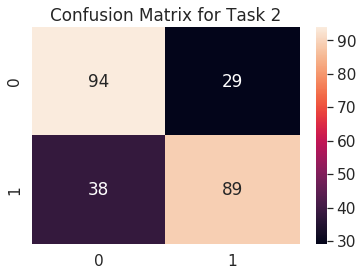

In [119]:
conf_matrix_task2 = confusion_matrix(y_test_task2, y_pred_task2)
plt.title("Confusion Matrix for Task 2")
sns.heatmap(conf_matrix_task2, annot=True, fmt="")
plt.show()

## TASK 3

### a. Apply feature transform on the features used in task 1 

First, lets take the clean data from task1

In [120]:
cardio.head() 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,56.00000,1.0,163.0,75.0,120.000000,80.0,0.0,0.0,0.0,0.0,1.0,0
1,44.00000,1.0,168.0,68.0,110.000000,70.0,0.0,0.0,0.0,0.0,1.0,0
2,54.00000,1.0,170.0,75.0,120.000000,80.0,0.0,0.0,0.0,0.0,1.0,1
3,52.00000,1.0,165.0,89.0,128.685879,80.0,0.0,0.0,0.0,0.0,1.0,0
4,53.38806,1.0,158.0,74.0,128.685879,93.0,2.0,0.0,0.0,1.0,1.0,1


Splitting the clean data into input(X_train) and output variables(y_train)

In [121]:
x_train = cardio.iloc[:,:-1]# Train features
y_train = cardio.iloc[:,-1]# Train output

In [122]:
clf_1=LogisticRegression(max_iter=1000)
clf_1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
#feature transform to degree 2
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
x_train_new = poly.fit_transform(x_train)

In [124]:
clf_2=LogisticRegression(max_iter=10000)
clf_2.fit(x_train_new,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
#feature transform to degree 3
poly_3 = PolynomialFeatures(3)
x_train_3 = poly_3.fit_transform(x_train)

In [126]:
clf_3=LogisticRegression(max_iter=10000)
clf_3.fit(x_train_3,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
from sklearn.model_selection import cross_val_score
print("Before feature transform: ")
print("Train score: ", clf_1.score(x_train,y_train))
print("Cross-val score: ", cross_val_score(clf_1, x_train,y_train, cv=5,).mean(),"\n")
print("After degree 2 feature transform: ")
print("Train score: ", clf_2.score(x_train_new,y_train))
print("Cross-val score: ", cross_val_score(clf_2, x_train_new,y_train, cv=5,).mean(),"\n")
print("After degree 3 feature transform: ")
print("Train score: ", clf_3.score(x_train_3,y_train))
print("Cross-val score: ", cross_val_score(clf_3, x_train_3,y_train, cv=5,).mean(),"\n")

Before feature transform: 
Train score:  0.706
Cross-val score:  0.69 

After degree 2 feature transform: 
Train score:  0.756
Cross-val score:  0.682 

After degree 3 feature transform: 
Train score:  0.786
Cross-val score:  0.6779999999999999 



### a. Does varying the polynomial degree change your accuracy?

From the above result we can see that the training accuracy increases and testing accuracy decreases after adding polynomial features. Clear case of *Overfitting*. This means that the model is trying to fit the data vert well but can't generalize the model. 

### b. crossvalidation error and in-sample error plot to identify high bias or high variance

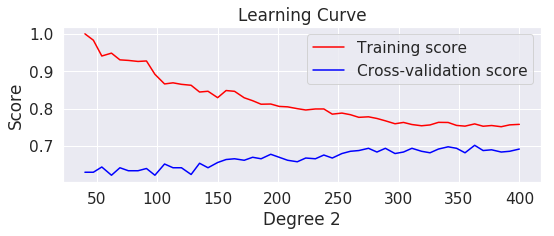

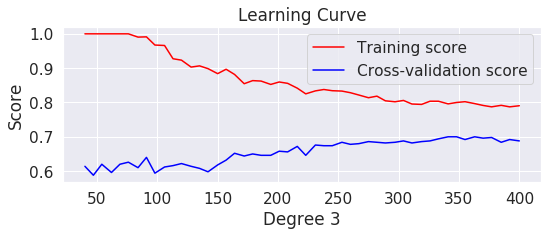

In [128]:
from sklearn.model_selection import learning_curve


train_sizes1, train_scores1, test_scores1 = learning_curve(clf_2, x_train_new,y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))
train_sizes2, train_scores2, test_scores2 = learning_curve(clf_3, x_train_3,y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))

#calculating mean of scores for all train scores
train_mean1 = np.mean(train_scores1, axis=1)
train_std1 = np.std(train_scores1, axis=1)

train_mean2 = np.mean(train_scores2, axis=1)
train_std2 = np.std(train_scores2, axis=1)

#Calculating mean and std for all test scores  
test_mean1 = np.mean(test_scores1, axis=1)
test_std1 = np.std(test_scores1, axis=1)

test_mean2 = np.mean(test_scores2, axis=1)
test_std2 = np.std(test_scores2, axis=1)

plt.figure(figsize=(8,6))
plt.subplot(2, 1, 1)
plt.plot(train_sizes1, train_mean1,  color="red",  label="Training score")
plt.plot(train_sizes1, test_mean1, color="blue", label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Degree 2"), plt.ylabel("Score"), plt.legend(loc="best")
plt.savefig("overfit1.png")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
plt.subplot(2, 1, 2)
plt.plot(train_sizes2, train_mean2,  color="red",  label="Training score")
plt.plot(train_sizes2, test_mean2, color="blue", label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Degree 3"), plt.ylabel("Score"), plt.legend(loc="best")
plt.savefig("overfit2.png")
plt.tight_layout()
plt.show()

As we can see from the graph that Training score is higher than cross-validation score which means that there is high variance. We can also notice that as we increase the degres of polynomial features the model overfits the data even more. 